# The minimizers of Motzkin polynomial

In [1]:
using DynamicPolynomials, MomentPolynomialOpt, Plots;
using JuMP, MosekTools; mmt_optimizer(JuMP.optimizer_with_attributes(Mosek.Optimizer, "QUIET" => true));

[ Info: Precompiling MomentPolynomialOpt [65cd4d85-9fe5-4fdc-93e2-c8798c615752]


We use Mosek solver for the convex optimization on SDP matrices.

In [2]:
X  = @polyvar x y
motz = x^4*y^2 + x^2*y^4 - 3x^2*y^2  + 1 

x⁴y² + x²y⁴ - 3x²y² + 1

This polynomial, known as Motzkin polynomial, is non-negative but not a sum of squares.

We construction a moment relaxation of order 6, imposing the moments to come from a probability measure, with total mass equal to 1:

In [3]:
v, M = minimize(motz,[],[],X,6)

(-4.8872999936298315e-9, A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 1 constraint
`Vector{AffExpr}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: NO_OPTIMIZER
Solver name: No optimizer attached.
Names registered in the model: basis, degree, dual, index, moments, monomials, nu, type, variables, y)

In [4]:
v

-4.8872999936298315e-9

The objective value is a lower bound of the actual mimimal value $0$ of Motzkin polynomial.

We extract a measure from the sequence of moments, using the function `MultivariateSeries.decompose`:

In [5]:
w, Xi = get_measure(M)

(Float64[], Matrix{Float64}(undef, 2, 0))

 `w` is the vector of weights and `Xi` is the matrix of points, that is support of the measure $\mu=\sum_i \omega_i \delta_{\Xi_i}$. `w[i]` is the weight of the Dirac measure corresponding to the point `Xi[:,i]` in this decomposition.

Here no point is found to approximate the optimal moment sequence.

Now, to find the minimizers, we add as constraints, that the gradient of the polynomial should vanish:

In [6]:
J = differentiate(motz,X)
v, M = minimize(motz, J,[], X, 6)

(3.508005206489722e-8, A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 73 constraints
`Vector{AffExpr}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: NO_OPTIMIZER
Solver name: No optimizer attached.
Names registered in the model: basis, degree, dual, index, moments, monomials, nu, type, variables, y)

In [7]:
w, Xi = get_measure(M)

(ComplexF64[0.2500002557692951 + 2.459699184908756e-20im, 0.24999971826800954 + 2.4632532654063837e-20im, 0.24999971826800496 - 4.621500317393238e-21im, 0.2500002557692956 - 7.901166120055862e-21im], ComplexF64[-1.0000002769852416 + 7.235664138030071e-18im -0.9998885652371537 - 2.2816957101921287e-16im 0.9998885652371393 - 5.600102269268173e-17im 1.0000002769852419 + 1.9005703668204767e-18im; -1.000000223683219 - 7.962988840975802e-18im 0.9998649220849618 + 2.5110504204834785e-16im -0.9998649220849452 + 6.163021254372132e-17im 1.0000002236832188 - 2.0916145820580463e-18im])

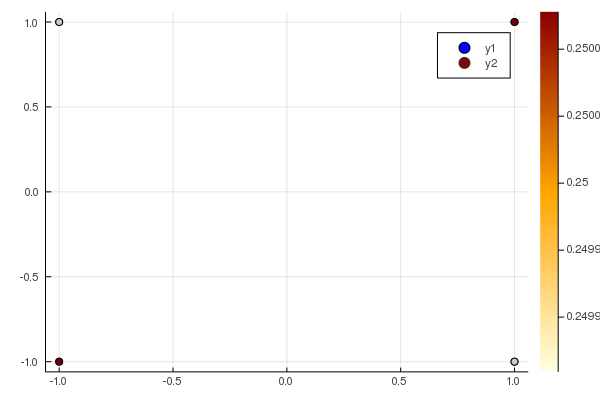

In [8]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue, fmt=:png)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)), fmt=:png)

We find approximately the $4$ minimizers.


Finally, to find the minimizers, we try another strategy and add the constraint that the polynomial should vanish, since we know that its minimal value (at the minimizers) is $0$:

In [9]:
v, M = minimize(motz, [motz], [], X, 6)

(6.36075870781102e-9, A JuMP Model
Minimization problem with:
Variables: 91
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 29 constraints
`Vector{AffExpr}`-in-`MathOptInterface.PositiveSemidefiniteConeTriangle`: 1 constraint
Model mode: AUTOMATIC
CachingOptimizer state: NO_OPTIMIZER
Solver name: No optimizer attached.
Names registered in the model: basis, degree, dual, index, moments, monomials, nu, type, variables, y)

In [10]:
w, Xi = get_measure(M)

([0.25002760879847424, 0.24997227997064125, 0.24997227997064245, 0.2500276087984727], [0.9999940087362019 -0.9999111310550343 0.9999111310550342 -0.999994008736202; 1.000026692417085 1.0000196501600218 -1.0000196501600218 -1.0000266924170849])

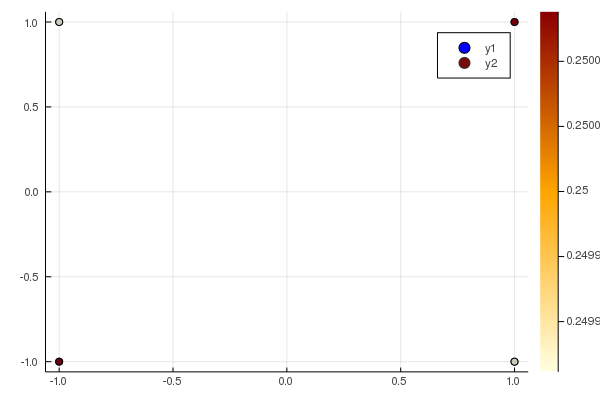

In [11]:
p0 = plot([-1,-1,1,1], [-1,1,-1,1], seriestype = :scatter, color=:blue, fmt=:png)
p1 = plot!(p0,real(Xi[1,:]), real(Xi[2,:]), seriestype = :scatter, zcolor = abs.(w), m = (:heat, 0.8, Plots.stroke(1, :black)), fmt=:png)

The minimizers (in red) are close to that actual minimizers (in blue).